## Datos de entretamiento y de prueba

In [2]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

In [3]:
data_tweets = pd.read_csv(r'dataset_twitter_cleaned.csv')

In [26]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
                                        data_tweets['full_text'], 
                                        data_tweets['label'],
                                        test_size=0.2
                                    )

In [27]:
train_Y.value_counts()

0    654
1    210
2    199
Name: label, dtype: int64

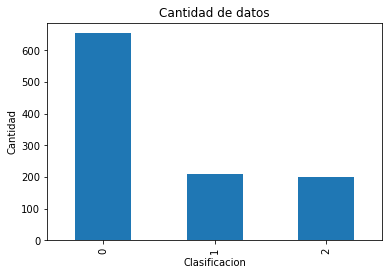

In [28]:
plt.title("Cantidad de datos")
plt.xlabel("Clasificacion")
plt.ylabel("Cantidad")
train_Y.value_counts().plot(kind='bar')
plt.show()

In [30]:
clasificacion = sorted(data_tweets['label'].unique())
clasificacion

[0, 1, 2]

## Vectorización

In [31]:
Encoder = LabelEncoder()
train_Y = Encoder.fit_transform(train_Y)
test_Y = Encoder.fit_transform(test_Y)

In [32]:
tfidf_vector = TfidfVectorizer(max_features=3000)
tfidf_vector.fit(data_tweets['full_text'])
train_X_Tfidf = tfidf_vector.transform(train_X)
test_X_Tfidf = tfidf_vector.transform(test_X)

In [33]:
dump(tfidf_vector, 'tfidf_vector.joblib')

['tfidf_vector.joblib']

In [4]:
tfidf_vector = load('tfidf_vector.joblib')

In [34]:
print(tfidf_vector.vocabulary_)

{'evento': 1795, 'así': 488, 'cuál': 1211, 'exclusión': 1812, 'maternar': 2698, 'pandemia': 3130, 'foco': 1932, 'depresivo': 1330, 'detonar': 1416, 'ansiedad': 378, 'bae': 556, 'hablar': 2084, 'salud': 3859, 'mental': 2745, 'motivar': 2861, 'empezar': 1613, 'terapia': 4194, 'afectar': 227, 'bien': 605, 'maternidad': 2699, 'pasar': 3171, 'miedo': 2787, 'inoculado': 2330, 'miserable': 2819, 'seguir': 3910, 'acatar': 154, 'orden': 3086, 'dictadurasanitaria': 1445, 'notestsnocovid': 2985, 'covid_19': 1129, 'noalpasesanitario': 2965, 'pcrros': 3193, 'yomerebelo9e': 4634, 'notoquenalosniños': 2992, 'notevacunesidiota': 2986, 'hasidounalivio': 2104, 'dios': 1462, 'desarrollador': 1353, 'videojuegos': 4518, 'morir': 2849, 'covid': 1126, 'después': 1400, 'recibir': 3654, 'vacuna': 4406, 'agujas': 263, 'creer': 1143, 'voy': 4570, 'estrés': 1772, 'mayor': 2702, 'perder': 3234, 'gusto': 2073, 'olfato': 3057, 'hacer': 2087, 'taurina': 4165, 'si': 3968, 'ir': 2382, 'novedad': 2994, 'fabricar': 1848,

In [35]:
print(train_X_Tfidf)

  (0, 4666)	0.222819180173706
  (0, 4498)	0.18103697078458264
  (0, 3968)	0.1243155550698669
  (0, 3824)	0.16028410710555693
  (0, 3543)	0.2054357103975604
  (0, 3510)	0.29182046967533587
  (0, 3229)	0.445638360347412
  (0, 3171)	0.20402991521910924
  (0, 3130)	0.11867154234546216
  (0, 2960)	0.2381108735497323
  (0, 2871)	0.20134948547498208
  (0, 2716)	0.2570535301230446
  (0, 2427)	0.24845019311631542
  (0, 1331)	0.10572830762110444
  (0, 1225)	0.21500252416881482
  (0, 705)	0.30415423776437794
  (0, 542)	0.3215377075405236
  (0, 378)	0.12814402623994528
  (1, 4648)	0.30724778478364867
  (1, 4026)	0.23384381680413868
  (1, 3860)	0.25045472263359303
  (1, 3859)	0.15987477042346968
  (1, 3495)	0.30724778478364867
  (1, 3254)	0.180615396248053
  (1, 3130)	0.113397488529108
  :	:
  (1061, 1133)	0.7154215293683059
  (1061, 1100)	0.42729641599195023
  (1062, 4565)	0.2536135340324377
  (1062, 4474)	0.13290586632247423
  (1062, 4333)	0.13105246562239706
  (1062, 4236)	0.2536135340324377
  (

In [36]:
feature_names = tfidf_vector.get_feature_names_out()
dense = train_X_Tfidf.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

In [37]:
df

,00,000,01,03,06,07,08,09,10,100,...,ómicrom,ómicron,óptimos,órganos,últimahora,últimamente,último,últimos,único,útero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222819,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [40]:
df.T.sum(axis=1)

from wordcloud import WordCloud
Cloud = WordCloud(max_words=50).generate_from_frequencies(df.T.sum(axis=1))

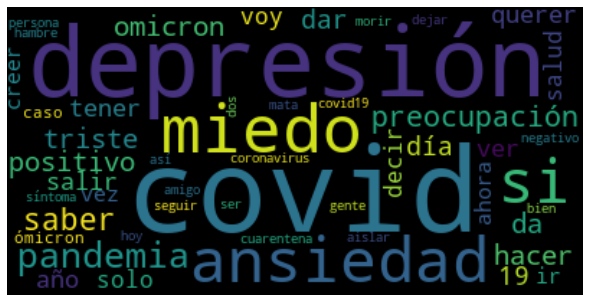

In [65]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Clasificador de Naive Bayes 

In [42]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf, train_Y)

prediction_NB = Naive.predict(test_X_Tfidf)

print("Naive Bayes - Precisión -> ", accuracy_score(prediction_NB, test_Y)*100)

Naive Bayes - Precisión ->  69.92481203007519


In [43]:
Naive.score(test_X_Tfidf, test_Y)

0.6992481203007519

In [44]:
print(classification_report(test_Y, prediction_NB))

              precision    recall  f1-score   support

           0       0.69      0.99      0.82       180
           1       0.83      0.13      0.22        39
           2       1.00      0.04      0.08        47

    accuracy                           0.70       266
   macro avg       0.84      0.39      0.37       266
weighted avg       0.77      0.70      0.60       266



#### Matriz de confusión

Text(33.0, 0.5, 'true')

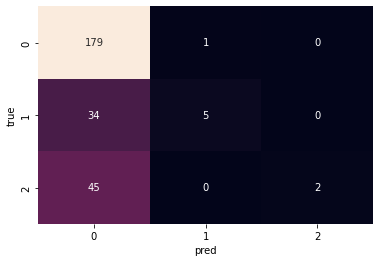

In [45]:
mat = confusion_matrix(test_Y, prediction_NB)
sns.heatmap(
    mat, 
    annot=True,
    fmt='d',
    cbar=False,
    xticklabels=clasificacion,
    yticklabels=clasificacion)
plt.xlabel('predicción')
plt.ylabel('valore real')

In [59]:
dump(Naive, 'naive-bayes-classifier.joblib')

['naive-bayes-classifier.joblib']

## Máquina de soporte vectorial

In [46]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_X_Tfidf, train_Y)

prediction_SVM = SVM.predict(test_X_Tfidf)

print("SVM - Precisión -> ", accuracy_score(prediction_SVM, test_Y)*100)

SVM - Precisión ->  81.57894736842105


In [47]:
print(classification_report(test_Y, prediction_SVM))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       180
           1       0.76      0.67      0.71        39
           2       0.74      0.49      0.59        47

    accuracy                           0.82       266
   macro avg       0.78      0.70      0.73       266
weighted avg       0.81      0.82      0.81       266



#### Matriz de confusión

Text(33.0, 0.5, 'true')

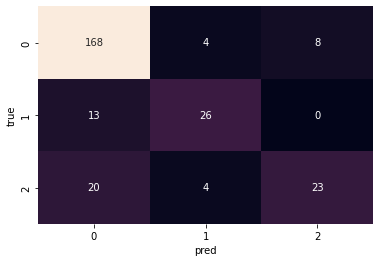

In [48]:
mat = confusion_matrix(test_Y, prediction_SVM)
sns.heatmap(
    mat, 
    annot=True,
    fmt='d',
    cbar=False,
    xticklabels=clasificacion,
    yticklabels=clasificacion)
plt.xlabel('pred')
plt.ylabel('true')

In [57]:
dump(SVM, 'support-vector-machine.joblib')

['support-vector-machine.joblib']

## Clasificador de Bosque Aleatorio

In [50]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(train_X_Tfidf, train_Y)

prediction_RFC = RFC.predict(test_X_Tfidf)

print("RFC - Precisión -> ", accuracy_score(prediction_RFC, test_Y)*100)

RFC - Precisión ->  80.45112781954887


In [51]:
print(classification_report(test_Y, prediction_RFC))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       180
           1       0.77      0.59      0.67        39
           2       0.79      0.40      0.54        47

    accuracy                           0.80       266
   macro avg       0.79      0.65      0.69       266
weighted avg       0.80      0.80      0.79       266



#### Matriz de confusión

Text(33.0, 0.5, 'true')

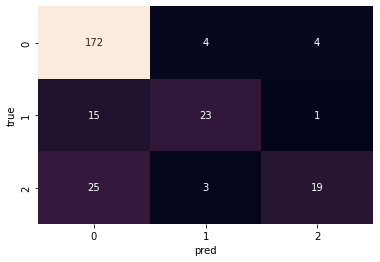

In [52]:
mat = confusion_matrix(test_Y, prediction_RFC)
sns.heatmap(
    mat, 
    annot=True,
    fmt='d',
    cbar=False,
    xticklabels=clasificacion,
    yticklabels=clasificacion)
plt.xlabel('pred')
plt.ylabel('true')

In [58]:
dump(RFC, 'random-forest-classifier.joblib')

['random-forest-classifier.joblib']

## Probando textos

In [55]:
import re
import spacy
import spacy_spanish_lemmatizer
nlp = spacy.load("es_core_news_sm")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")

In [56]:
url = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
menciones = '@[\w\-]+'
hashtag = '#[\w\-]+'
caracteres_especiales = r'\W'
varios_espacios= r'\s+'

def clean_tweet(tweet):
    tweet_procesado = tweet.lower() 
    tweet_procesado = re.sub(menciones, ' ', tweet_procesado)
    tweet_procesado = re.sub(url, ' ', tweet_procesado)
    tweet_procesado = re.sub(caracteres_especiales, ' ', tweet_procesado)
    tweet_procesado = re.sub(" q ", ' que ', tweet_procesado)
    tweet_procesado = re.sub(" pq ", ' porque ', tweet_procesado)
    tweet_procesado = re.sub(" xq ", ' porque ', tweet_procesado)
    tweet_procesado = re.sub(varios_espacios, ' ', tweet_procesado, flags=re.I)
    return tweet_procesado

def procesar_texto(cadena):
    palabras = cadena.split() 
    cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words("spanish")]
    return cadena_limpia

SVM = load('support-vector-machine.joblib')
Naive = load('naive-bayes-classifier.joblib')
RFC = load('random-forest-classifier.joblib')
tfidf_vector = load('tfidf_vector.joblib')

In [60]:
def predict_mental_issues(tweet, model):
    cleaned = clean_tweet(tweet)
    procesado = procesar_texto(cleaned)
    texto_procesado = ' '.join(procesado)

    lemmas = []
    for token in nlp(texto_procesado):
        lemmas.append(token.lemma_)
    print(lemmas)
    
    texto_final = ' '.join(lemmas)
    Test_X_Tfidf = tfidf_vector.transform([texto_final])
    print(Test_X_Tfidf)
    if model == 'NB':
        predictions = Naive.predict(Test_X_Tfidf)
    elif model == 'SVM':
        predictions = SVM.predict(Test_X_Tfidf)
    elif model == 'RFC':
        predictions = RFC.predict(Test_X_Tfidf)
    else:
        predictions = 'No se encontro el modelo'
    return predictions

In [63]:
tweet = input('Escriba un tweet: ')
prediccion = predict_mental_issues(tweet, 'SVM')

if(prediccion[0] == 1):
    print("Sintomas de DEPRESION")
elif(prediccion[0] == 2):
    print("Sintomas de ANSIEDAD")
else:
    print("No presenta ningún sintoma")

Escriba un tweet: estoy muy triste
['triste']
  (0, 4333)	1.0
Sintomas de DEPRESION
